In [1]:
import pandas as pd
import numpy as np
import zipfile

In [2]:
df_us = pd.read_csv('data/clean_youtube_dataframe_us.csv.zip',compression="zip",engine='python')

In [4]:
df_in = pd.read_csv('data/clean_youtube_dataframe_in.csv.zip',compression="zip",engine='python')

In [5]:
df_ca = pd.read_csv('data/clean_youtube_dataframe_ca.csv.zip',compression="zip",engine='python')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px

# **Correlation of US cleaned dataset**

In [9]:
df_us.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_of_day,day_of_week
0,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.0,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908.0,5855.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Evening,Tuesday
1,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146739.0,2794.0,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Afternoon,Tuesday
2,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.0,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353787.0,2628.0,40221.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Afternoon,Tuesday
3,3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10.0,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771.0,23251.0,1856.0,7647.0,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Afternoon,Tuesday
4,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.0,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.0,45802.0,964.0,2196.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Afternoon,Tuesday


In [10]:
df_us = df_us.drop(['Unnamed: 0'],axis=1)

In [11]:
df_us.shape

(178560, 18)

In [12]:
df_us = df_us.drop(['thumbnail_link'],axis=1)

**View_count vs Likes**

<Figure size 1000x800 with 0 Axes>

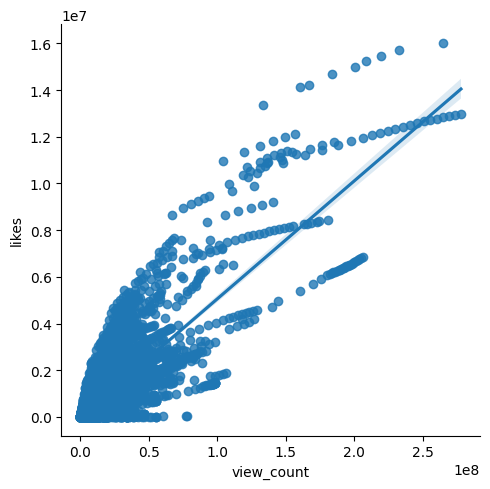

In [13]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'likes', data = df_us)
plt.show()

**View_count vs Comment count**

<Figure size 1000x800 with 0 Axes>

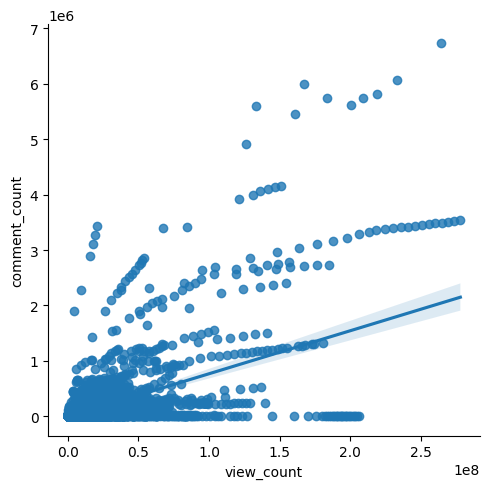

In [14]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'comment_count', data = df_us)
plt.show()

**View_count vs Dislikes**

<Figure size 1000x800 with 0 Axes>

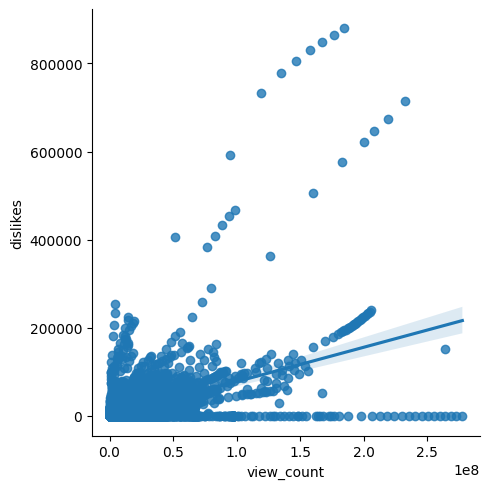

In [15]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'dislikes', data = df_us)
plt.show()

**Comment_count vs Likes**

<Figure size 720x576 with 0 Axes>

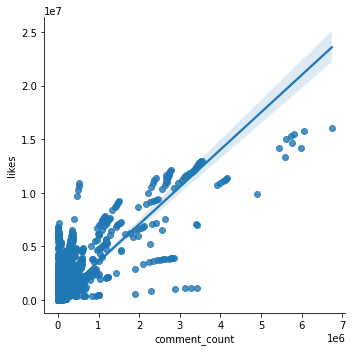

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'comment_count', y = 'likes', data = df_us)
plt.show()

**Comment_count vs dislikes**

<Figure size 1000x800 with 0 Axes>

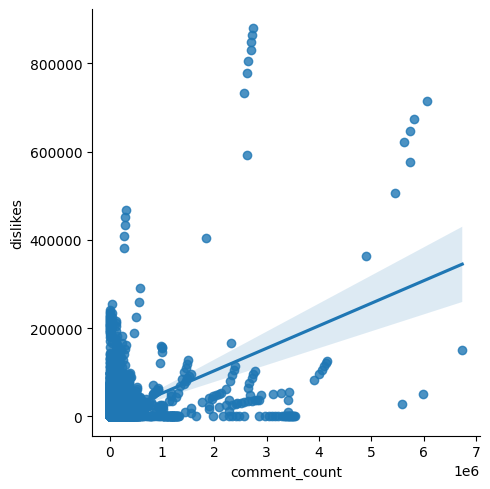

In [16]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'comment_count', y = 'dislikes', data = df_us)
plt.show()

In [17]:
df_corr_us= df_us[['likes', 'dislikes', 'comment_count', 'view_count']]
df_corr_us.corr()

,likes,dislikes,comment_count,view_count
likes,1.000000,0.533606,0.755612,0.857692
dislikes,0.533606,1.000000,0.448916,0.547988
comment_count,0.755612,0.448916,1.000000,0.620009
view_count,0.857692,0.547988,0.620009,1.000000


<AxesSubplot: >

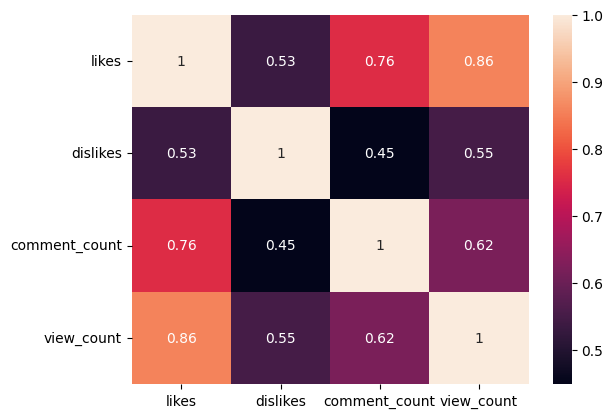

In [18]:
sns.heatmap(df_corr_us.corr(), annot= True)

# **Correlation of IN cleaned dataset**

In [19]:
df_in.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_of_day,day_of_week
0,0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Night,Wednesday
1,1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Morning,Tuesday
2,2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Morning,Tuesday
3,3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Night,Monday
4,4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Night,Tuesday


In [20]:
df_in = df_in.dropna()

In [21]:
df_in.shape

(131266, 19)

In [22]:
df_in = df_in.drop(['Unnamed: 0','thumbnail_link','time_of_day','day_of_week'],axis=1)

**View_count vs Likes**

<Figure size 720x576 with 0 Axes>

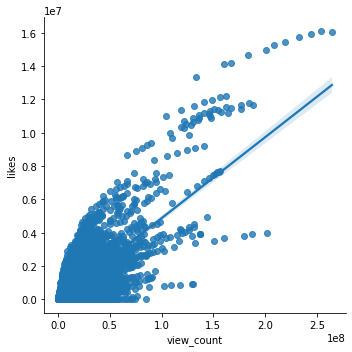

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'likes', data = df_in)
plt.show()

**View_count vs Comment count**

<Figure size 720x576 with 0 Axes>

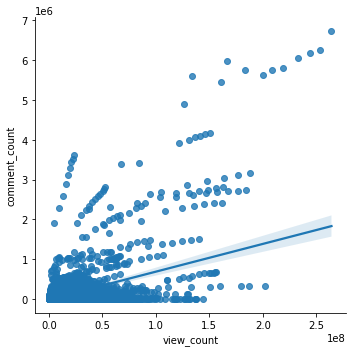

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'comment_count', data = df_in)
plt.show()

**View_count vs Dislikes**

<Figure size 720x576 with 0 Axes>

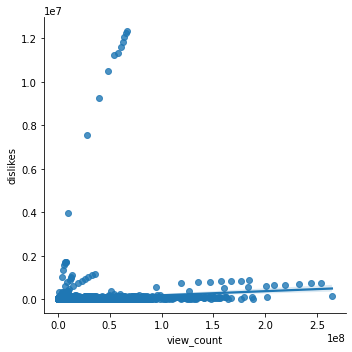

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'dislikes', data = df_in)
plt.show()

**Comment_count vs Likes**

<Figure size 720x576 with 0 Axes>

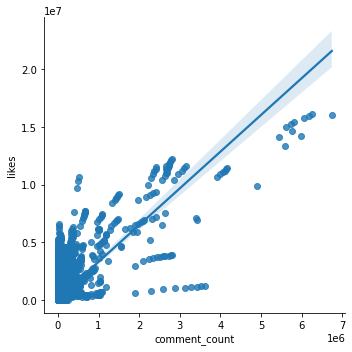

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'comment_count', y = 'likes', data = df_in)
plt.show()

**Comment_count vs dislikes**

<Figure size 720x576 with 0 Axes>

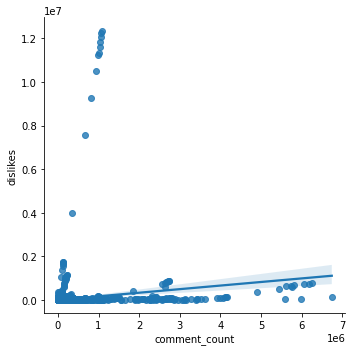

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'comment_count', y = 'dislikes', data = df_in)
plt.show()

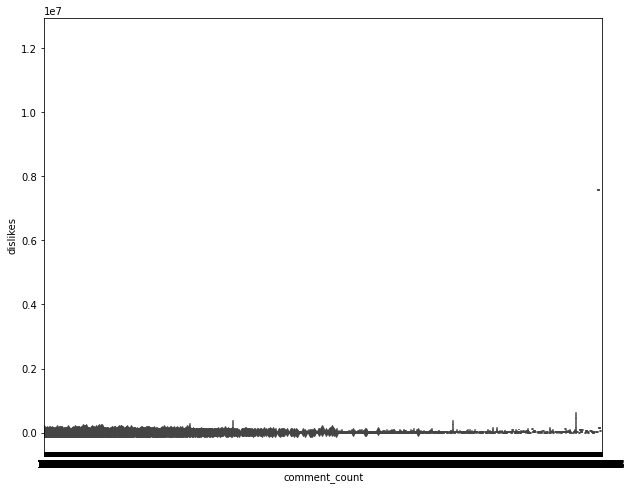

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'comment_count', y = 'dislikes', data = df_in)
plt.show()

In [ ]:
df_corr_in= df_in[['likes', 'dislikes', 'comment_count', 'view_count']]
df_corr_in.corr()

,likes,dislikes,comment_count,view_count
likes,1.000000,0.078874,0.686867,0.807501
dislikes,0.078874,1.000000,0.155095,0.138087
comment_count,0.686867,0.155095,1.000000,0.536366
view_count,0.807501,0.138087,0.536366,1.000000


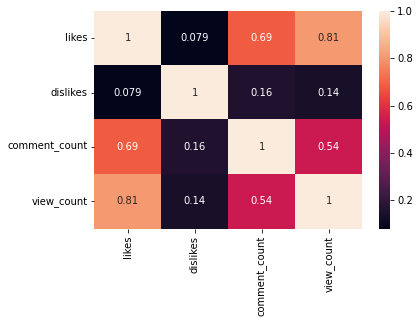

In [ ]:
sns.heatmap(df_corr_in.corr(), annot= True)

# **Correlation of CA cleaned dataset**

In [23]:
df_ca.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_of_day,day_of_week
0,0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10.0,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.0,296541.0,6180.0,30059.0,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Morning,Tuesday
1,1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24.0,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853.0,353797.0,2628.0,40222.0,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Afternoon,Tuesday
2,2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688.0,146740.0,2794.0,16549.0,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Afternoon,Tuesday
3,3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22.0,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156914.0,5857.0,35331.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,Evening,Tuesday
4,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26.0,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889.0,45803.0,964.0,2198.0,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Afternoon,Tuesday


In [ ]:
df_ca = df_ca.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_ca.shape

(178875, 18)

In [ ]:
df_ca = df_ca.drop(['thumbnail_link'],axis=1)

**View_count vs Likes**

<Figure size 720x576 with 0 Axes>

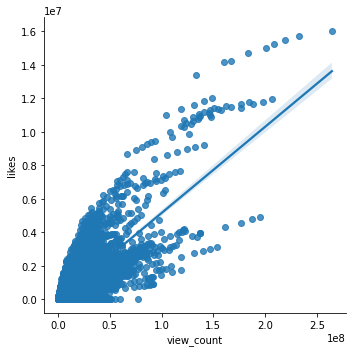

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'likes', data = df_ca)
plt.show()

**View_count vs Comment count**

<Figure size 720x576 with 0 Axes>

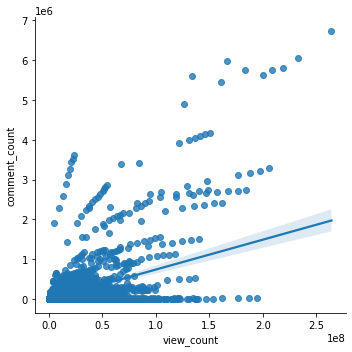

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'comment_count', data = df_ca)
plt.show()

**View_count vs Dislikes**

<Figure size 720x576 with 0 Axes>

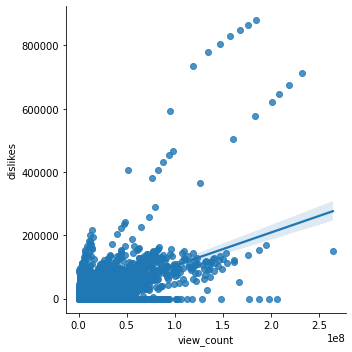

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'view_count', y = 'dislikes', data = df_ca)
plt.show()

**Comment_count vs Likes**

<Figure size 720x576 with 0 Axes>

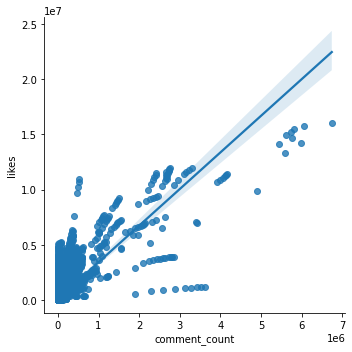

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'comment_count', y = 'likes', data = df_ca)
plt.show()

**Comment_count vs dislikes**

<Figure size 720x576 with 0 Axes>

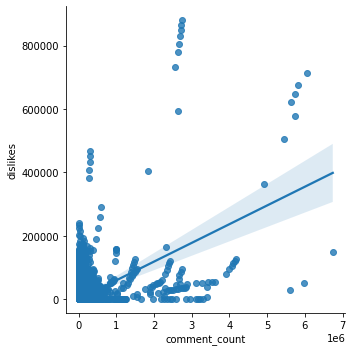

In [ ]:
plt.figure(figsize=(10,8))
sns.lmplot(x = 'comment_count', y = 'dislikes', data = df_ca)
plt.show()

In [ ]:
df_corr_ca= df_ca[['likes', 'dislikes', 'comment_count', 'view_count']]
df_corr_ca.corr()

,likes,dislikes,comment_count,view_count
likes,1.000000,0.562019,0.721472,0.833768
dislikes,0.562019,1.000000,0.474745,0.628776
comment_count,0.721472,0.474745,1.000000,0.558774
view_count,0.833768,0.628776,0.558774,1.000000


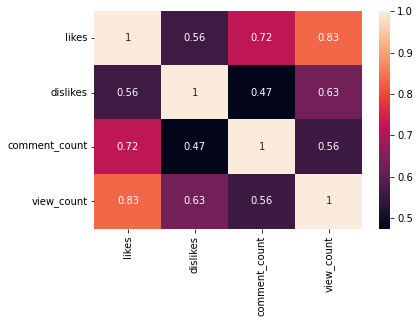

In [ ]:
sns.heatmap(df_corr_ca.corr(), annot= True)